In [46]:
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [47]:
from pvlib.iotools import read_epw
weather, meta = read_epw('../data/processed/meteo.epw')
weather.head()


,year,month,day,hour,minute,data_source_unct,temp_air,temp_dew,relative_humidity,atmospheric_pressure,...,ceiling_height,present_weather_observation,present_weather_codes,precipitable_water,aerosol_optical_depth,snow_depth,days_since_last_snowfall,albedo,liquid_precipitation_depth,liquid_precipitation_quantity
2005-01-01 00:00:00+01:00,2005,1,1,1,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,7.1,1.5,68,98414,...,99999,9,999999999,10,0.118,18,0,0.732,0.0,99.0
2005-01-01 01:00:00+01:00,2005,1,1,2,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.7,1.5,69,98414,...,99999,9,999999999,10,0.118,18,0,0.717,0.0,99.0
2005-01-01 02:00:00+01:00,2005,1,1,3,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.4,1.0,68,98414,...,99999,9,999999999,10,0.118,18,0,0.702,0.0,99.0
2005-01-01 03:00:00+01:00,2005,1,1,4,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.2,0.8,68,98414,...,99999,9,999999999,10,0.118,18,0,0.689,0.0,99.0
2005-01-01 04:00:00+01:00,2005,1,1,5,60,*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?*?,6.0,0.5,68,98414,...,99999,9,999999999,10,0.118,18,0,0.676,0.0,99.0


In [48]:
import pandas as pd

summary = pd.read_csv('../data/processed/summary.csv')
summary.head()


,Zonenr,Rel_BAL,BAL_ENERGY,DQAIRdt,QHEAT,QCOOL,QINF,QVENT,QCOUPL,QTRANS,QGAININT,QWGAIN,QSOLGAIN,QSOLAIR
0,1,0.0,1.548000e-08,234.9,7300.0,0.0,0.0,0.0,-436900.0,429900.0,0.0,0.0,0.0,0.0
1,2,0.0,6.835000e-09,113.0,29990000.0,0.0,-38920000.0,0.0,8200000.0,-205300.0,0.0,0.0,939900.0,0.0
2,3,0.0,-7.202000e-09,1212.0,58960.0,0.0,-1469000.0,0.0,-813700.0,-5457000.0,1215000.0,0.0,6467000.0,0.0
3,4,0.0,-4.229000e-08,2167.0,20150.0,0.0,-1685000.0,0.0,-5523000.0,-9769000.0,4704000.0,0.0,12250000.0,0.0
4,5,0.0,6.735000e-09,1822.0,47730.0,0.0,-1008000.0,0.0,-2289000.0,-4017000.0,2227000.0,0.0,5041000.0,0.0


In [49]:
energy_zones = pd.read_csv('../data/processed/energy_zones.csv')
energy_zones.head()

,TIME,REL_BAL_ENERGY,1_B4_QBAL,1_B4_DQAIRdT,1_B4_QHEAT,1_B4_QCOOL,1_B4_QINF,1_B4_QVENT,1B4_QCOUP,1_B4_QTRANS,...,5_B4_QHEAT,5_B4_QCOOL,5_B4_QINF,5_B4_QVENT,5B4_QCOUP,5_B4_QTRANS,5_B4_QGINT,5_B4_QWGAIN,5_B4_QSOL,5_B4_QSOLAIR
0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
1,1.0,0.0,3.780000e-12,90.0,235.2,0.0,0.0,0.0,0.0,-145.2,...,949.1,0.0,-53.76,0.0,0.0,-688.3,374.9,0.0,7.024000e-12,0.0
2,2.0,0.0,6.366000e-12,0.0,274.8,0.0,0.0,0.0,0.0,-274.8,...,719.4,0.0,-35.41,0.0,0.0,-1059.0,374.9,0.0,-2.947000e-12,0.0
3,3.0,0.0,-1.791000e-12,0.0,246.7,0.0,0.0,0.0,0.0,-246.7,...,670.4,0.0,-37.01,0.0,0.0,-1008.0,374.9,0.0,6.124000e-12,0.0
4,4.0,0.0,2.444000e-12,0.0,224.1,0.0,0.0,0.0,0.0,-224.1,...,630.2,0.0,-38.13,0.0,0.0,-967.0,374.9,0.0,6.242000e-12,0.0


In [50]:
cultural_e = pd.read_csv('../data/processed/cultural-e.csv')
cultural_e.head()

,TIME,SQHEAT_1,SQCOOL_1,TAIR_corridor,TOP_corridor,TAIR_bathroom,TOP_bathroom,TAIR_bed1_single,TOP_bed1_single,TAIR_livingRoom,...,label.59,label.60,label.61,label.62,label.63,label.64,label.65,label.66,label.67,label.68
0,744.0,4531.775899,0.0,22.668277,22.768048,21.0,20.953208,23.131838,23.054186,23.922669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,745.0,5159.466999,0.0,22.575688,22.702311,21.0,20.947163,22.919005,22.900891,23.684695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,746.0,5771.544460,0.0,22.531162,22.661414,21.0,20.940933,22.853437,22.826565,23.604862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,747.0,6408.700490,0.0,22.486411,22.620185,21.0,20.934462,22.774815,22.746062,23.509889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,748.0,6939.723150,0.0,22.439736,22.577544,21.0,20.928128,22.699411,22.668833,23.421991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Graphs

In [51]:
from src.visualization import visualize as viz

## Climate

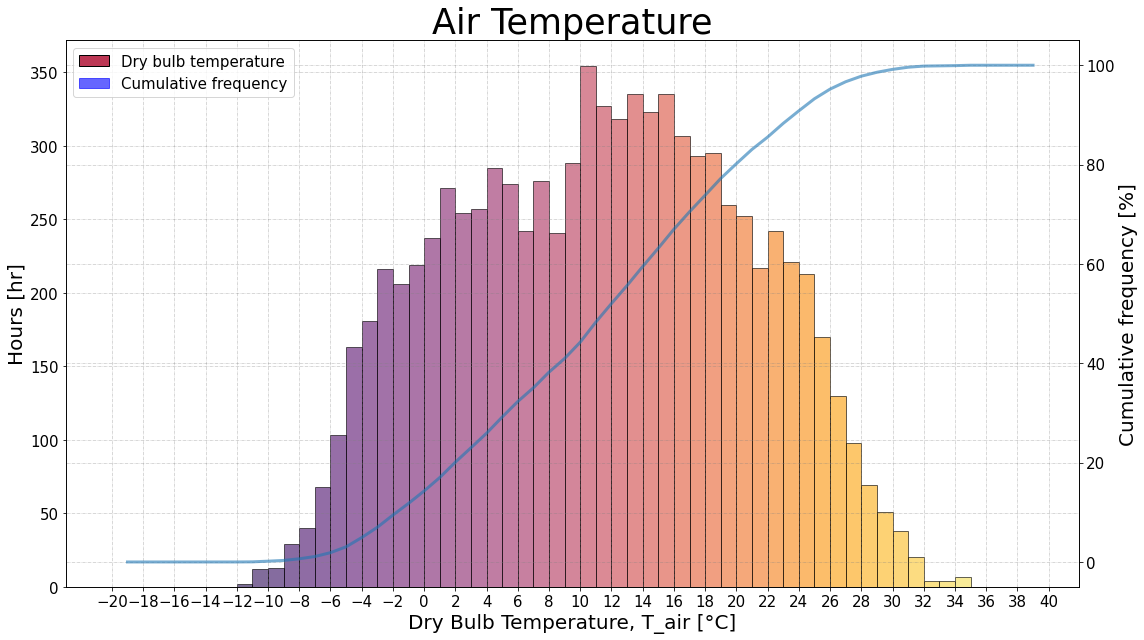

In [52]:
viz.air_temperature(weather)

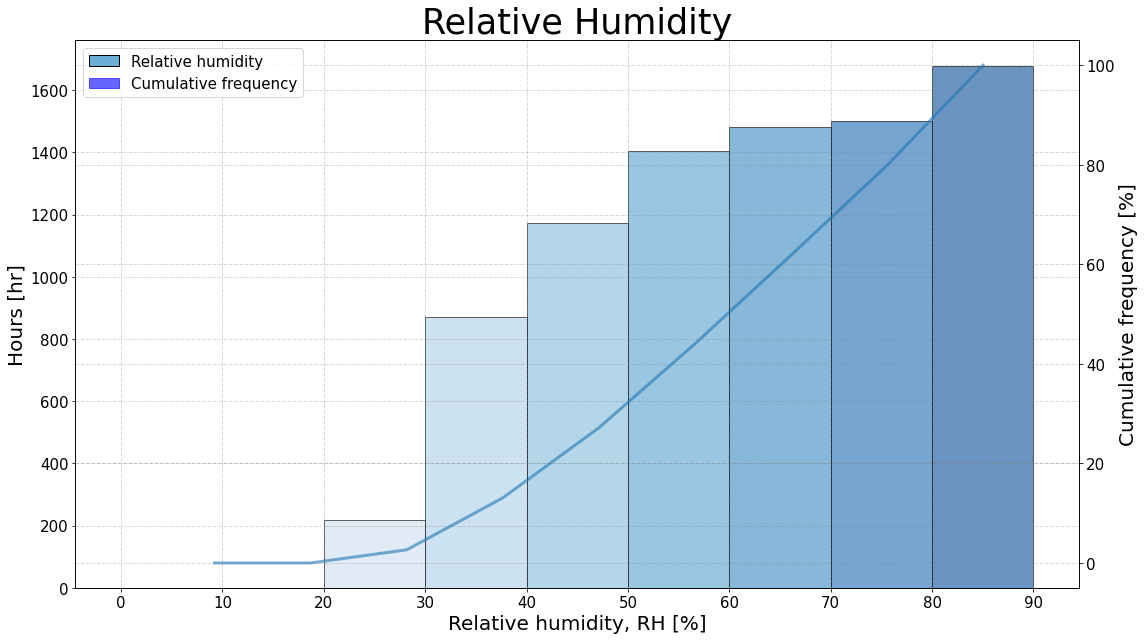

In [53]:
viz.relative_humidity(weather)

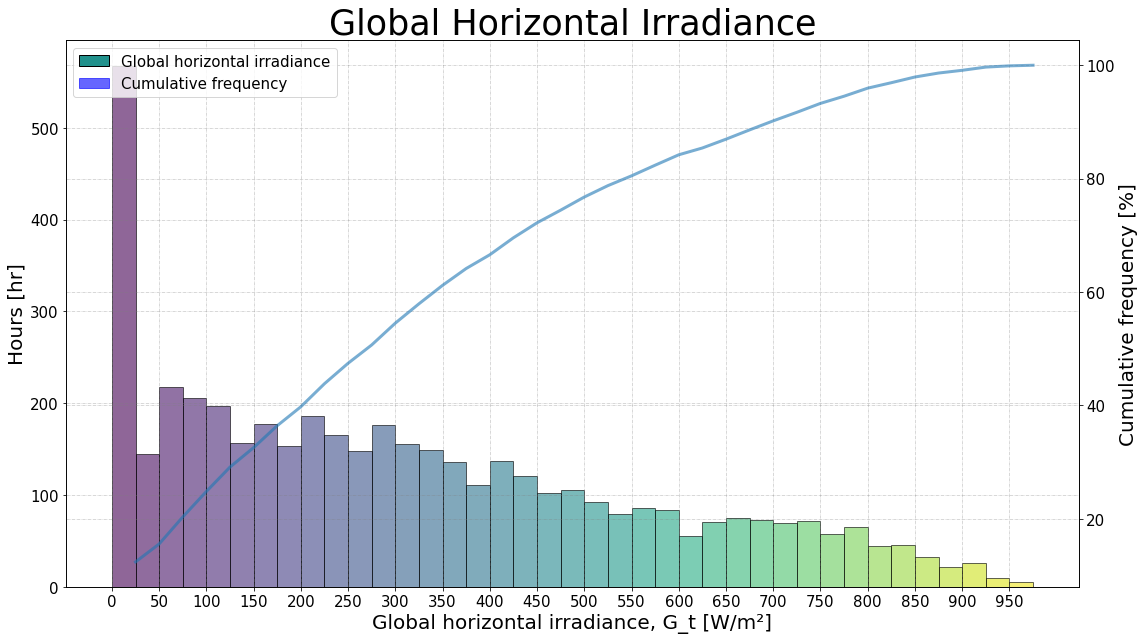

In [54]:
viz.horizontal_irradiance(weather)

## Energy

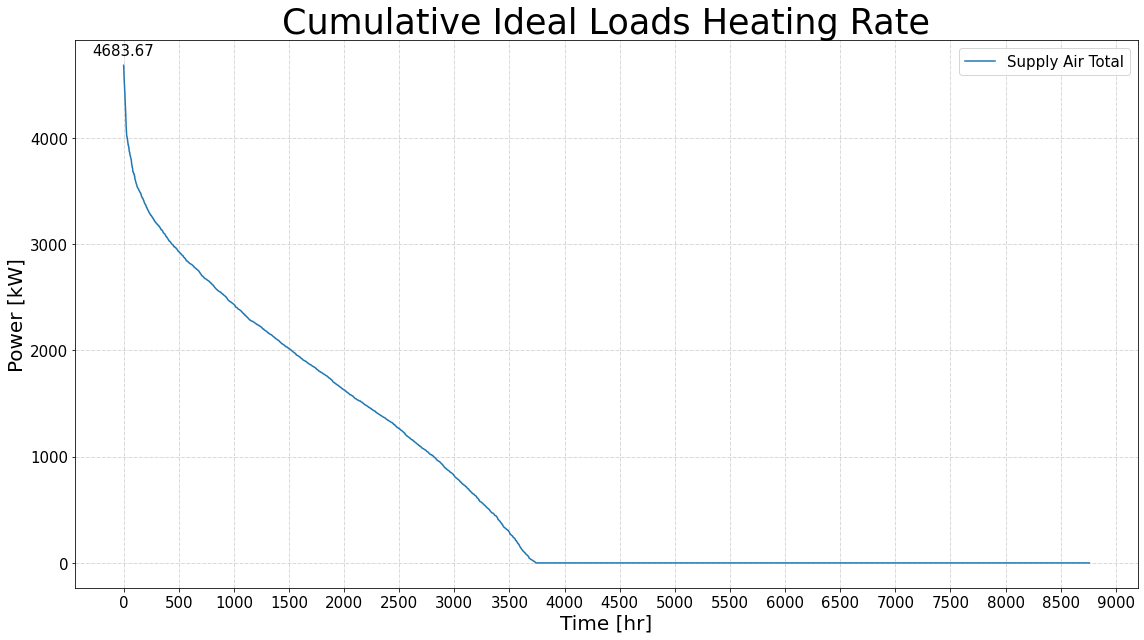

In [55]:
viz.heating_loads(cultural_e)

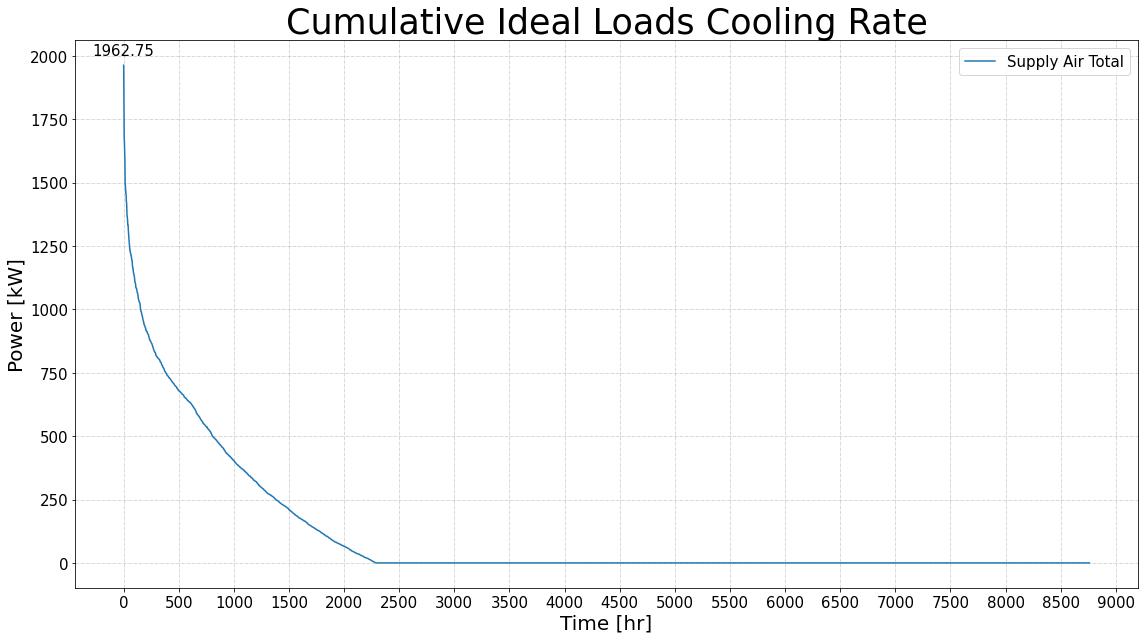

In [56]:
viz.cooling_loads(cultural_e)

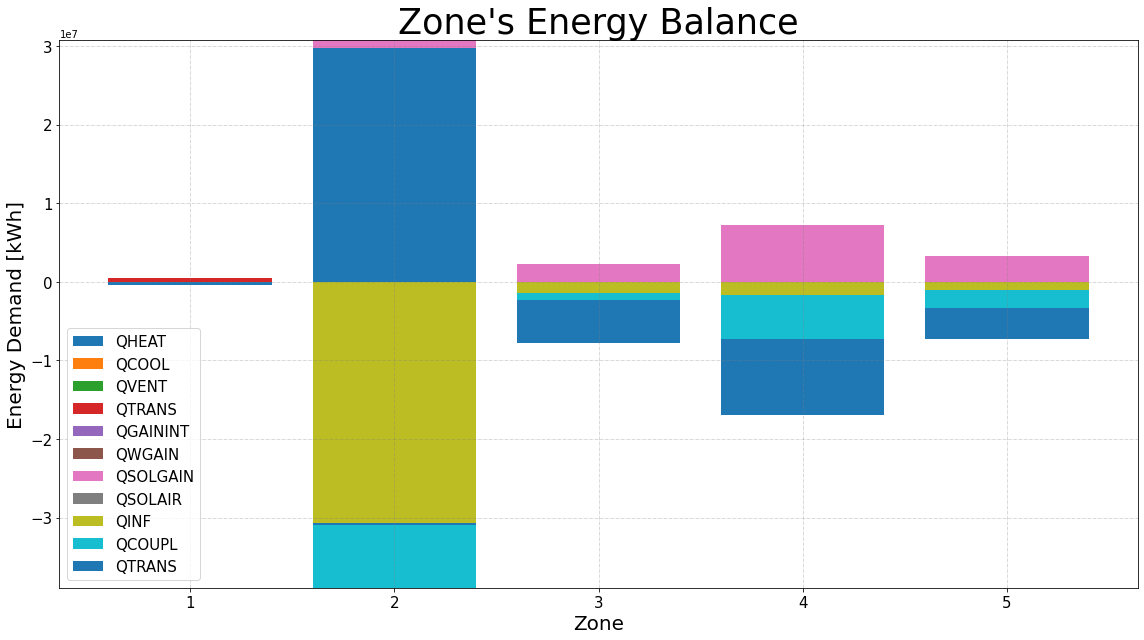

In [57]:
viz.energy_balance(summary)

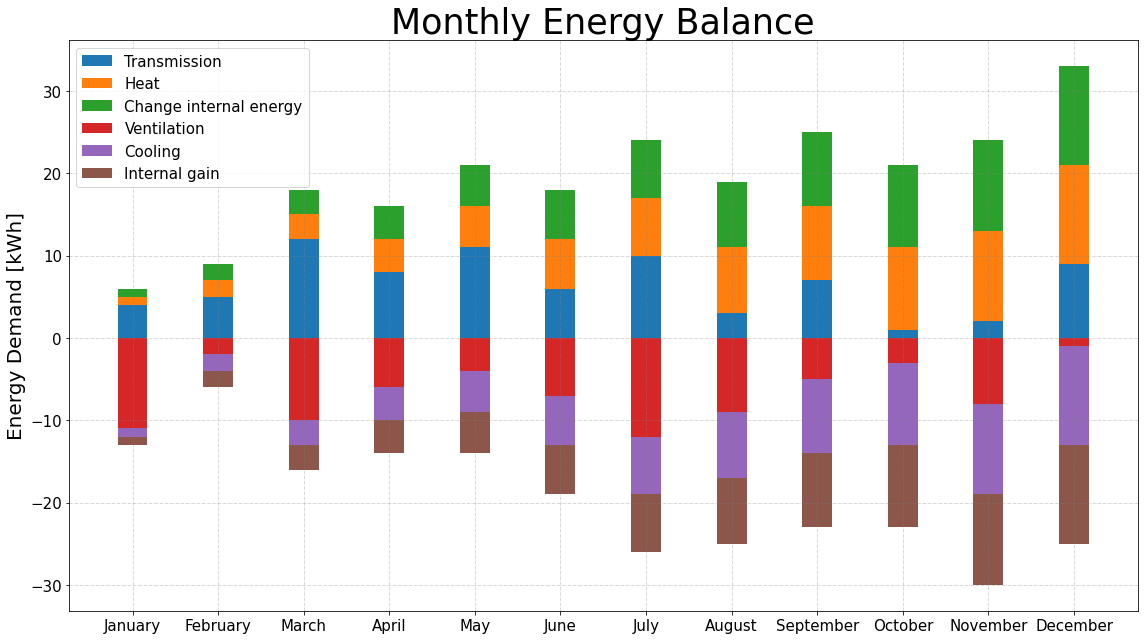

In [58]:
viz.zone_energy_balance()

## Comfort

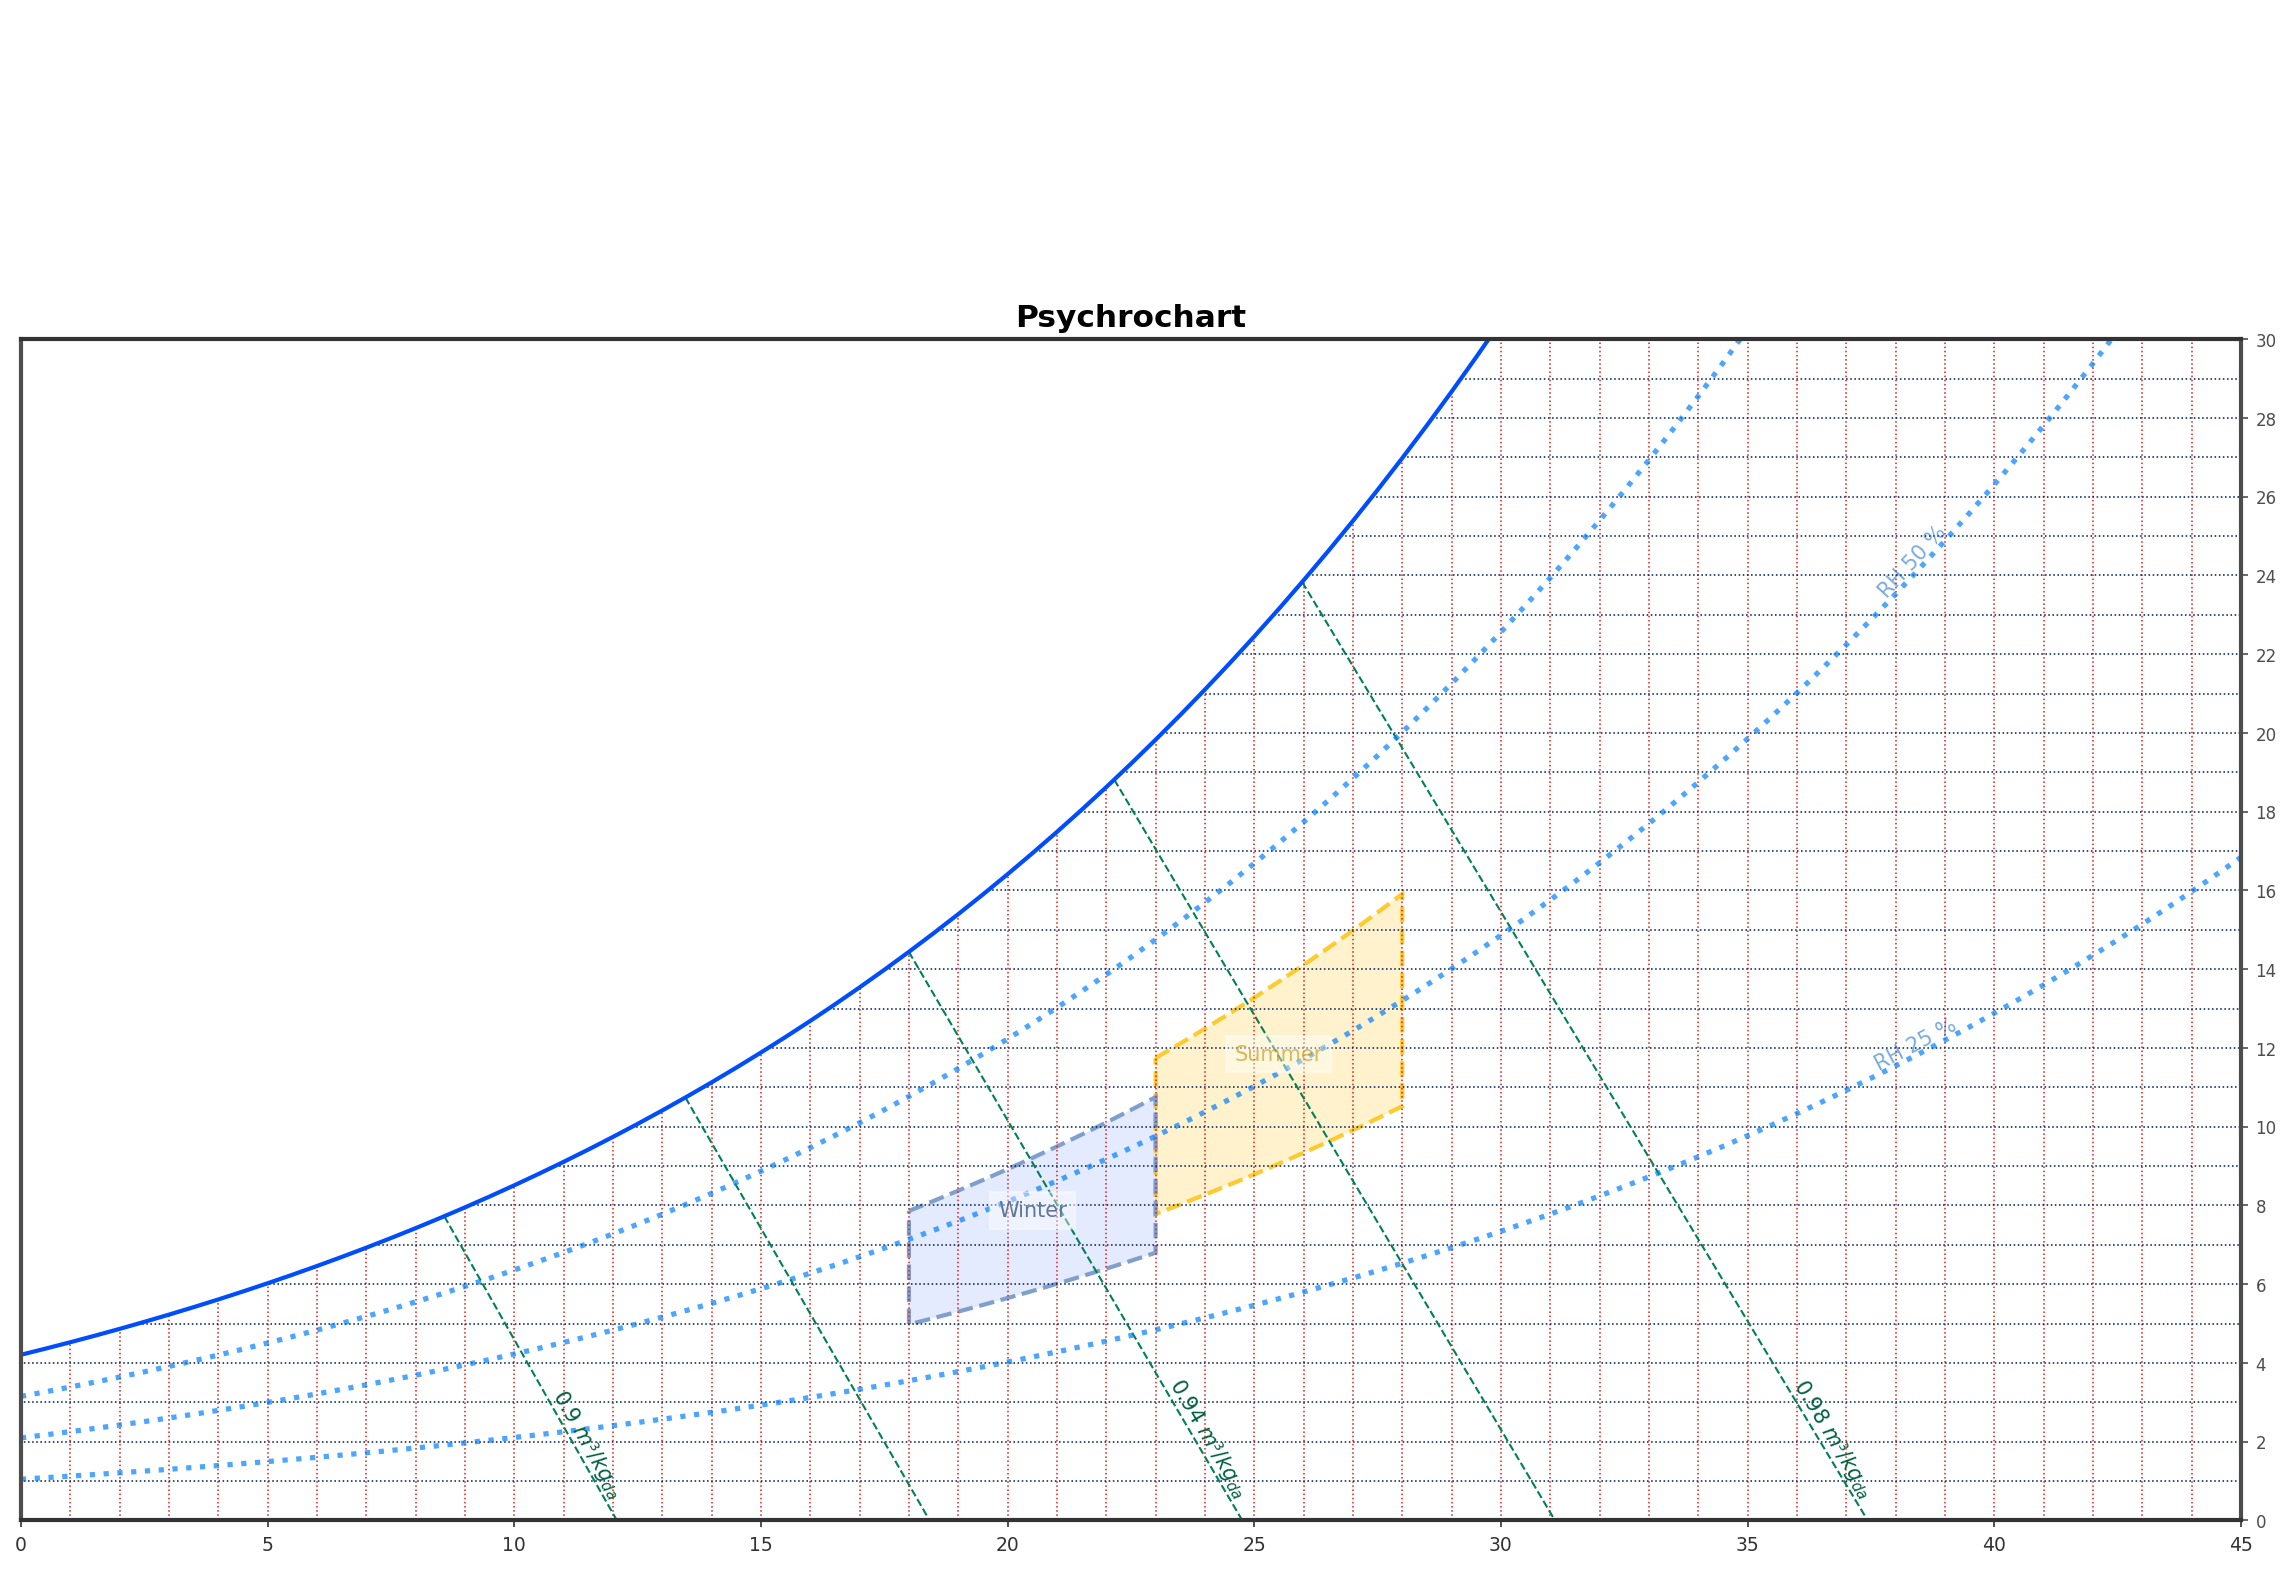

In [59]:
viz.psychrochart().get_figure()

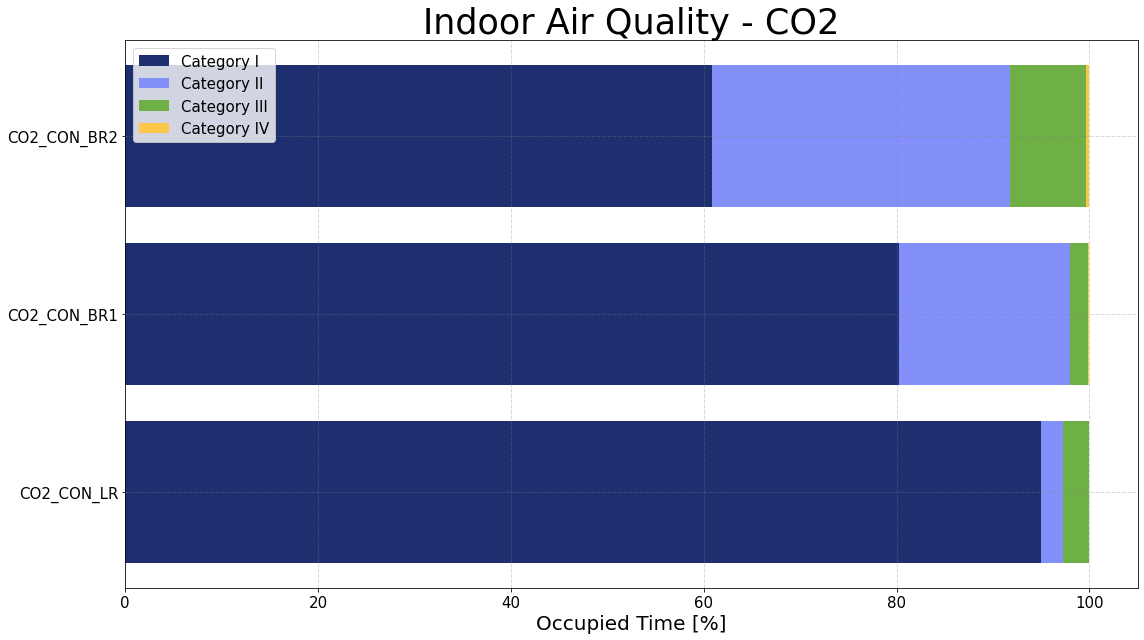

In [63]:
viz.iaq_co2(cultural_e, ['LR'], ['BR1', 'BR2'])

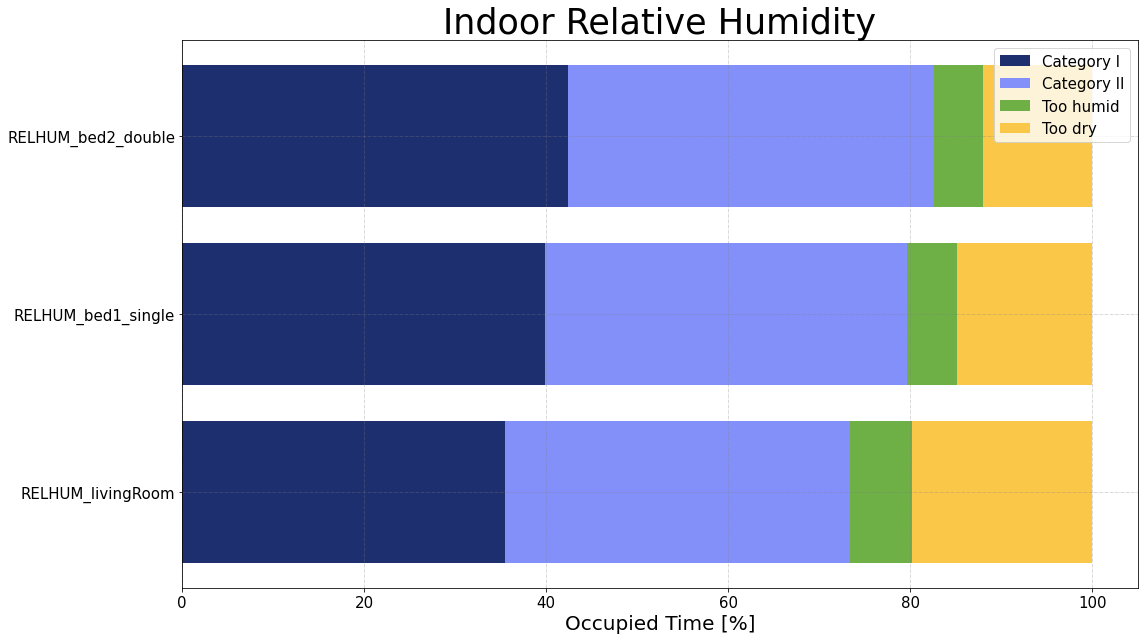

In [65]:
viz.relh(cultural_e, ['RELHUM_livingRoom', 'RELHUM_bed1_single','RELHUM_bed2_double'], ['SCH_PER_LR', 'SCH_PER_BR1', 'SCH_PER_BR2'])